Travail Demandé


In [ ]:
cameraman = data.camera()


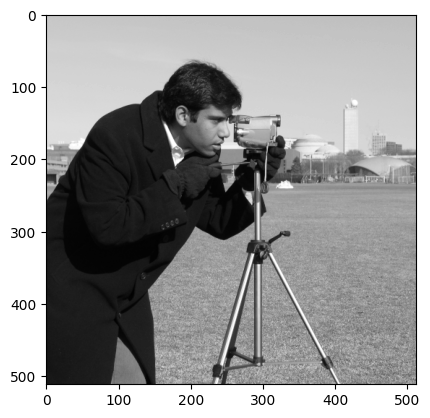

In [ ]:
plt.imshow(cameraman, cmap='gray')
plt.show()


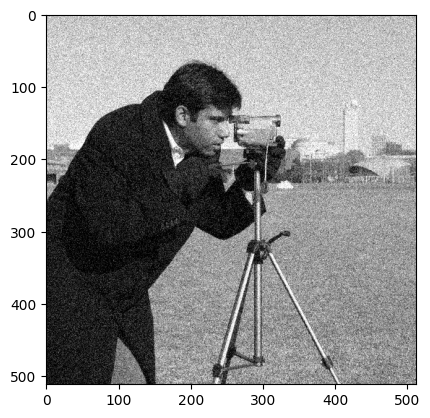

In [ ]:
from skimage import util

imGauss = util.random_noise(cameraman, mode='gaussian', var=0.01)
plt.imshow(imGauss, cmap='gray')
plt.show()


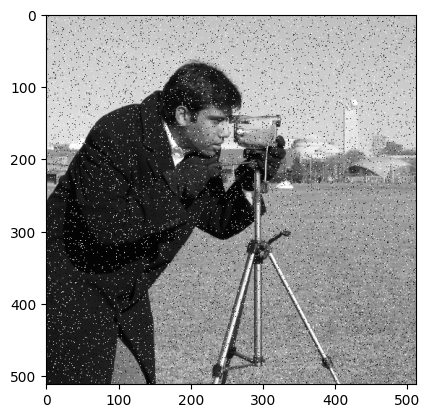

In [ ]:
from skimage.util import random_noise

imSP = random_noise(cameraman, mode='s&p')
plt.imshow(imSP, cmap='gray')
plt.show()


4- Restaurer à partir de imGauss

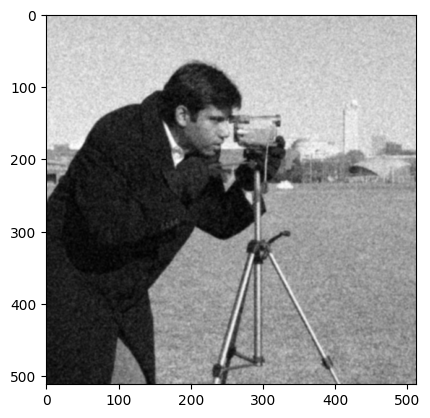

In [ ]:
from scipy import ndimage
restoredImGauss = ndimage.gaussian_filter(imGauss, sigma=1)
plt.imshow(restoredImGauss, cmap='gray')
plt.show()


Restaurer à partir de SPimg

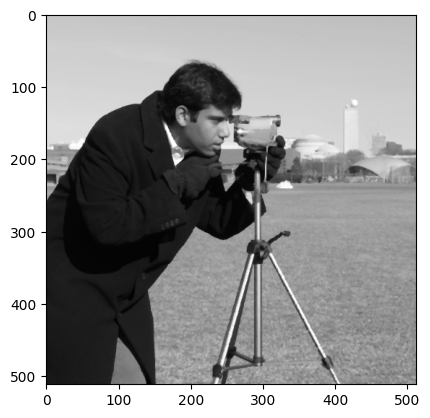

In [ ]:
restoredImSP = ndimage.median_filter(imSP, size=3)
plt.imshow(restoredImSP, cmap='gray')
plt.show()


Evaluation des restaurations:

In [ ]:
from skimage import metrics

# bruit gaussien
psnr_gauss = metrics.peak_signal_noise_ratio(cameraman, restoredImGauss)
mse_gauss = metrics.mean_squared_error(cameraman, restoredImGauss)

print("PSNR pour l'image avec bruit gaussien :", psnr_gauss)
print("MSE pour l'image avec bruit gaussien :", mse_gauss)

# bruit de sel et de poivre
psnr_sp = metrics.peak_signal_noise_ratio(cameraman, restoredImSP)
mse_sp = metrics.mean_squared_error(cameraman, restoredImSP)

print("PSNR pour l'image avec bruit de sel et de poivre :", psnr_sp)
print("MSE pour l'image avec bruit de sel et de poivre :", mse_sp)


PSNR pour l'image avec bruit gaussien : 4.724671140545837
MSE pour l'image avec bruit gaussien : 21908.530413587214
PSNR pour l'image avec bruit de sel et de poivre : 4.724767792396934
MSE pour l'image avec bruit de sel et de poivre : 21908.04284661474


<ipython-input-38-5975337db099>:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_gauss = metrics.peak_signal_noise_ratio(cameraman, restoredImGauss)
<ipython-input-38-5975337db099>:11: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_sp = metrics.peak_signal_noise_ratio(cameraman, restoredImSP)


In [ ]:
##A votre avis, est-ce que les images résultantes dans les deux cas ont été convenablement restaurées ? Evaluez les restaurations en calculant les deux mesures de qualité PSNR et MSE dans les deux cas. Commentez.
##( Avant d’afficher les deux images, on a cru que c’est plus difficile de restaurer une image à laquelle on a appliqué 
##un bruit salt and pepper. Mais après avoir affiché les images, on a constaté que l’image résultante dans le 1er cas( à partir de imGauss)
## n’est   pas convenablement restaurée. En effet, l’image n’est pas aussi claire que l’image originale à laquelle on a appliqué le bruit gaussien.  
##Par contre, pour l’image résultante dans le 2ème cas(imSP) , elle est convenablement restaurée )
##Mais en ce qui concerne les valeurs de MSE et PSNR, les deux images présentent des valeurs de PSNR très faibles, 
##ce qui indique une qualité de restauration médiocre. Il convient de noter que le PSNR optimal est supérieur à 30. 
##De plus, les valeurs de MSE sont relativement élevées, ce qui suggère que les différences entre les images restaurées
## et l'image d'origine sont significatives. Les résultats obtenus suggèrent que les filtres de restauration utilisés 
##n'ont pas réussi à restaurer efficacement les images, peut-être en raison de la forte variance des bruits ajoutés ou 
##de l'inadaptation des filtres aux caractéristiques spécifiques des bruits présents dans chaque image.